In [2]:
from data import HomDensityDataset
data = HomDensityDataset(root="/export/canton/data/yma93/anydim_transferability/GNN_size_generalizability",
                         N=5000,
                         n=50,
                         graph_model="spiked",
                         task="conditional_triangle")

In [8]:
from torch_geometric.utils import to_dense_adj
A=to_dense_adj(data[0].edge_index).squeeze()
A.sum(dim=0)

tensor([42., 42., 47., 49., 35., 47., 43., 41., 36., 46., 47., 45., 47., 44.,
        46., 42., 49., 46., 44., 44., 44., 42., 46., 43., 44., 39., 45., 45.,
        39., 45., 39., 45., 40., 33., 46., 48., 42., 46., 40., 46., 44., 42.,
        46., 43., 45., 44., 44., 45., 40., 48.])

In [32]:
from ign_layers import layer_2_to_2_anydim, layer_2_to_1_anydim
import torch
gnn = layer_2_to_2_anydim(input_depth=1, output_depth=3)
gnn.all_bias = torch.nn.Parameter(torch.ones(1,3,1,1))
A = torch.randn(5, 3, 30, 30) * 50
A2 = torch.kron(A, torch.ones(1,1,5,5))
A = gnn(gnn(A))
A2 = gnn(gnn(A2))
print(
    torch.max(
        torch.abs(
            torch.kron(A, torch.ones(1, 1, 5, 5)) - A2,
        )
    )
)

tensor(1.1444e-05, grad_fn=<MaxBackward1>)


In [31]:
A = torch.randn(5, 3, 30, 30) * 50
A2 = torch.kron(A, torch.ones(1,1,5,5))
gnn = layer_2_to_1_anydim(input_depth=3, output_depth=3)
X = gnn(A)
X2 = gnn(A2)
print(
    torch.max(
        torch.abs(
            torch.kron(X, torch.ones(1, 1, 5)) - X2,
        )
    )
)   

tensor(7.6294e-06, grad_fn=<MaxBackward1>)


In [59]:
# check whether model is compatible
from model import GNN_layer
import torch

reduced = True
gnn1 = GNN_layer(A_in_channels=1, A_out_channels=3, x_in_channels=3, x_out_channels=3, reduced=reduced)
# gnn1.A_bias = torch.nn.Parameter(torch.ones(1,1,1,3))
# gnn1.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))
# gnn1.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))
gnn2 = GNN_layer(A_in_channels=3, A_out_channels=3, x_in_channels=3, x_out_channels=3, reduced=reduced)
# gnn2.A_bias = torch.nn.Parameter(torch.ones(1, 1, 1, 3))
# gnn2.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))
# gnn2.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))

A = torch.randn(5, 1, 30, 30) * 5
X = torch.randn(5, 30, 3) * 50
A2 = torch.kron(A, torch.ones(1, 1, 10, 10))
X2 = torch.kron(X, torch.ones(1, 10, 1))

A, X = gnn1(A, X)
A, X = gnn2(A, X)
A = A.contiguous()
X = X.contiguous()

A2, X2 = gnn1(A2, X2)
A2, X2 = gnn2(A2, X2)
A2 = A2.contiguous()
X2 = X2.contiguous()

In [60]:
print(torch.max(torch.abs(torch.kron(A, torch.ones(1, 1, 10, 10))- A2,)))

tensor(0.0022, grad_fn=<MaxBackward1>)


In [61]:
print(torch.max(torch.abs((torch.kron(X, torch.ones(1, 10, 1)) - X2)/X2)))

tensor(0.0088, grad_fn=<MaxBackward1>)


In [3]:
torch.allclose(torch.kron(A, torch.ones(1, 1, 10, 10)), A2, atol=1e-2)

True

In [31]:
torch.allclose(torch.kron(X, torch.ones(1, 10, 1)), X2, rtol=1e-2)

True

In [7]:
X[0, :, 0]

tensor([ -138.0289,  2374.2568,  1885.9329,  5880.6777,  2585.2817, -4164.3267,
         1503.0387, -1917.3857,   202.5159, -4823.2051,  2099.5747, -1644.4325,
        -6831.9419, -3192.9985,  -529.5280, -1379.6025, -5791.6953, -5297.5801,
         -305.5816, -8731.4033,   370.5906,  -979.9750,   900.9713, -3107.4626,
         3191.2153, -5164.0146,  -370.4365, -4045.1904,  2239.4126,  2477.7068],
       grad_fn=<SelectBackward0>)

In [8]:
X2[0,:,0]

tensor([ -138.0194,  -138.0194,  -138.0194,  -138.0197,  -138.0194,  -138.0194,
         -138.0194,  -138.0197,  -138.0194,  -138.0194,  2374.2825,  2374.2810,
         2374.2815,  2374.2825,  2374.2825,  2374.2810,  2374.2815,  2374.2825,
         2374.2825,  2374.2810,  1885.8997,  1885.8994,  1885.8994,  1885.8987,
         1885.8997,  1885.8994,  1885.8994,  1885.8987,  1885.8997,  1885.8994,
         5880.6709,  5880.6709,  5880.6709,  5880.6709,  5880.6709,  5880.6709,
         5880.6709,  5880.6709,  5880.6709,  5880.6709,  2585.2883,  2585.2874,
         2585.2874,  2585.2881,  2585.2883,  2585.2874,  2585.2874,  2585.2881,
         2585.2883,  2585.2874, -4164.3237, -4164.3257, -4164.3232, -4164.3237,
        -4164.3237, -4164.3257, -4164.3232, -4164.3237, -4164.3237, -4164.3257,
         1503.0149,  1503.0129,  1503.0129,  1503.0134,  1503.0149,  1503.0129,
         1503.0129,  1503.0134,  1503.0149,  1503.0129, -1917.3818, -1917.3818,
        -1917.3809, -1917.3818, -1917.38

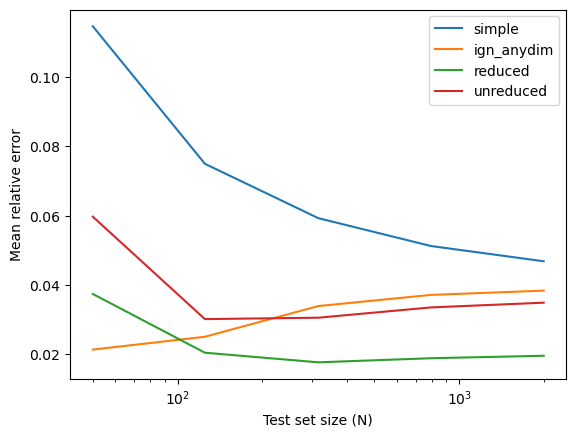

In [34]:
import os,json
import numpy as np
import matplotlib.pyplot as plt
num_trials = 10
log_test_n_range = np.arange(1.7, 3.4, 0.4)
test_n_range = np.array([int(10**i) for i in log_test_n_range])
for model in ["simple","ign_anydim", "reduced", "unreduced"]:
    fname = f"results_Sociality_conditional_triangle_{model}.json"
    current_directory = os.getcwd()
    with open(os.path.join("log/size_generalizability", fname), "r") as f:
        results = json.load(f)
    mse_list = [results[model][str(seed)] for seed in range(num_trials)]
    mean_mse = np.median(mse_list, axis=0)
    std_mse = np.std(mse_list, axis=0)

    x = np.array(test_n_range)
    plt.plot(x, mean_mse, label = model)
    # plt.fill_between(
    #     x,
    #     mean_mse - std_mse,
    #     mean_mse + std_mse,
    #     alpha=0.3,
    # )
plt.xscale("log")
plt.xlabel("Test set size (N)")
plt.ylabel("Mean relative error")
plt.legend()

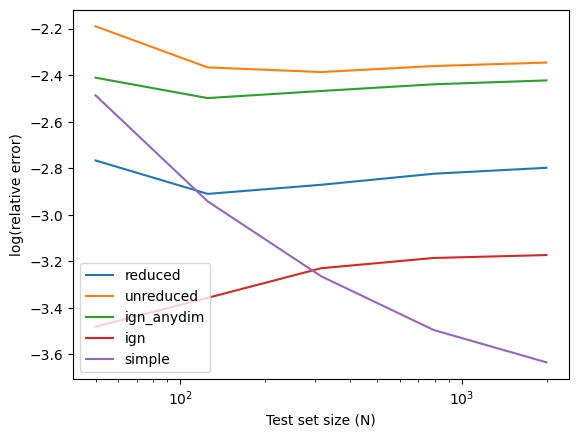

In [4]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

num_trials = 10
log_test_n_range = np.arange(1.7, 3.4, 0.4)
test_n_range = np.array([int(10**i) for i in log_test_n_range])
for model in ["reduced", "unreduced", "ign_anydim", "ign", "simple"]:
    fname = f"results_Gaussian_conditional_triangle_{model}.json"
    current_directory = os.getcwd()
    with open(os.path.join("log/size_generalizability", fname), "r") as f:
        results = json.load(f)
    mse_list = [results[model][str(seed)] for seed in range(num_trials)]
    mean_mse = np.mean(np.log(mse_list), axis=0)
    # std_mse = np.std(mse_list, axis=0)

    x = np.array(test_n_range)
    plt.plot(x, mean_mse, label=model)
    # plt.fill_between(
    #     x,
    #     mean_mse - std_mse,
    #     mean_mse + std_mse,
    #     alpha=0.3,
    # )
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Test set size (N)")
plt.ylabel("log(relative error)")
plt.legend()

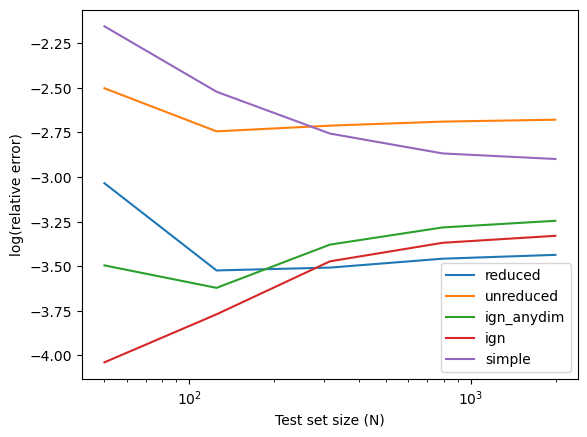

In [1]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

num_trials = 20
log_test_n_range = np.arange(1.7, 3.4, 0.4)
test_n_range = np.array([int(10**i) for i in log_test_n_range])
for model in ["reduced", "unreduced", "ign_anydim", "ign", "simple"]:
    fname = f"results_Sociality_conditional_triangle_{model}.json"
    current_directory = os.getcwd()
    with open(os.path.join("log/size_generalizability", fname), "r") as f:
        results = json.load(f)
    mse_list = [results[model][str(seed)] for seed in range(num_trials)]
    mean_mse = np.mean(np.log(mse_list), axis=0)
    # std_mse = np.std(mse_list, axis=0)

    x = np.array(test_n_range)
    plt.plot(x, mean_mse, label=model)
    # plt.fill_between(
    #     x,
    #     mean_mse - std_mse,
    #     mean_mse + std_mse,
    #     alpha=0.3,
    # )
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Test set size (N)")
plt.ylabel("log(relative error)")
plt.legend()

# study trained unreduced model

In [20]:
import torch
state_dict = torch.load("log/transferability/anydim_transferability/el33aj98/checkpoints/epoch=494-step=11385-val_loss=0.00.ckpt")["state_dict"]

In [21]:
state_dict.keys()

odict_keys(['model.layers.0.A_bias', 'model.layers.0.X1_bias', 'model.layers.0.X2_bias', 'model.layers.0.A_l1.weight', 'model.layers.0.A_l2.weight', 'model.layers.0.A_l4.weight', 'model.layers.0.A_l6.weight', 'model.layers.0.A_l7.weight', 'model.layers.0.A_l3.weight', 'model.layers.0.A_l5.weight', 'model.layers.0.X1_l1.weight', 'model.layers.0.X1_l2.weight', 'model.layers.0.X2_l1.weight', 'model.layers.0.X2_l2.weight', 'model.layers.0.X1_l3.weight', 'model.layers.0.X1_l6.weight', 'model.layers.0.X2_l3.weight', 'model.layers.0.X2_l6.weight', 'model.layers.0.X1_l4.weight', 'model.layers.0.X1_l5.weight', 'model.layers.0.X2_l4.weight', 'model.layers.0.X2_l5.weight', 'model.layers.0.out_transform.weight', 'model.layers.2.A_bias', 'model.layers.2.X1_bias', 'model.layers.2.X2_bias', 'model.layers.2.A_l1.weight', 'model.layers.2.A_l2.weight', 'model.layers.2.A_l4.weight', 'model.layers.2.A_l6.weight', 'model.layers.2.A_l7.weight', 'model.layers.2.A_l3.weight', 'model.layers.2.A_l5.weight', 'mo

In [24]:
state_dict["model.layers.0.A_l5.weight"]

tensor([[ 0.2645],
        [-0.1183],
        [-0.0171],
        [-0.2293]], device='cuda:0')

In [25]:
for key in state_dict.keys():
    if 'A_l3' in key or 'A_l5' in key:
        print(key)
        print(state_dict[key])

model.layers.0.A_l3.weight
tensor([[-0.1712],
        [ 0.3150],
        [-0.1358],
        [ 0.1191]], device='cuda:0')
model.layers.0.A_l5.weight
tensor([[ 0.2645],
        [-0.1183],
        [-0.0171],
        [-0.2293]], device='cuda:0')
model.layers.2.A_l3.weight
tensor([[ 0.0415, -0.1278,  0.0180, -0.0045],
        [-0.0220,  0.1251,  0.1515,  0.1566],
        [-0.0064,  0.1020,  0.0051,  0.1379],
        [ 0.0236,  0.0466, -0.0763, -0.1192]], device='cuda:0')
model.layers.2.A_l5.weight
tensor([[ 0.1353, -0.0460, -0.0427,  0.1464],
        [-0.0796, -0.0674, -0.1315,  0.0293],
        [-0.0738, -0.0675, -0.1346,  0.0488],
        [ 0.0200,  0.1519,  0.0781, -0.0458]], device='cuda:0')
model.layers.4.A_l3.weight
tensor([[ 0.0166, -0.1109,  0.1469,  0.0081],
        [ 0.0013, -0.1317, -0.0661,  0.0285],
        [ 0.0429,  0.0062, -0.0748,  0.1183],
        [ 0.0072,  0.0959, -0.0490, -0.1206]], device='cuda:0')
model.layers.4.A_l5.weight
tensor([[-0.1292, -0.0597, -0.0779,  0.1159]

In [26]:
for key in state_dict.keys():
    if "X1_l4" in key or "X1_l5" in key:
        print(key)
        print(state_dict[key])

model.layers.0.X1_l4.weight
tensor([[ 0.2711],
        [-0.2672],
        [ 0.2948],
        [ 0.3205]], device='cuda:0')
model.layers.0.X1_l5.weight
tensor([[-0.1367],
        [ 0.0720],
        [-0.2625],
        [ 0.2768]], device='cuda:0')
model.layers.2.X1_l4.weight
tensor([[-0.0834,  0.1184, -0.1457,  0.0644],
        [ 0.1175, -0.1567,  0.0638, -0.1537],
        [ 0.0557, -0.0297,  0.2175, -0.1541],
        [-0.6285, -0.3497, -0.0226, -0.3259]], device='cuda:0')
model.layers.2.X1_l5.weight
tensor([[ 0.1503, -0.0176, -0.0005, -0.1531],
        [ 0.0429, -0.0422,  0.0589, -0.1402],
        [ 0.0321,  0.0169,  0.1299, -0.1880],
        [ 0.2646, -0.3699,  0.4625, -0.2996]], device='cuda:0')
model.layers.4.X1_l4.weight
tensor([[-0.0747,  0.0728, -0.0276,  0.0911],
        [-0.0602, -0.0289,  0.1109,  0.0030],
        [-0.1122, -0.1349, -0.0425, -0.0547],
        [-0.1856, -0.0507,  0.2063,  0.0837]], device='cuda:0')
model.layers.4.X1_l5.weight
tensor([[ 0.0605,  0.1377,  0.1111,  0

0.8646647167633873 0.0


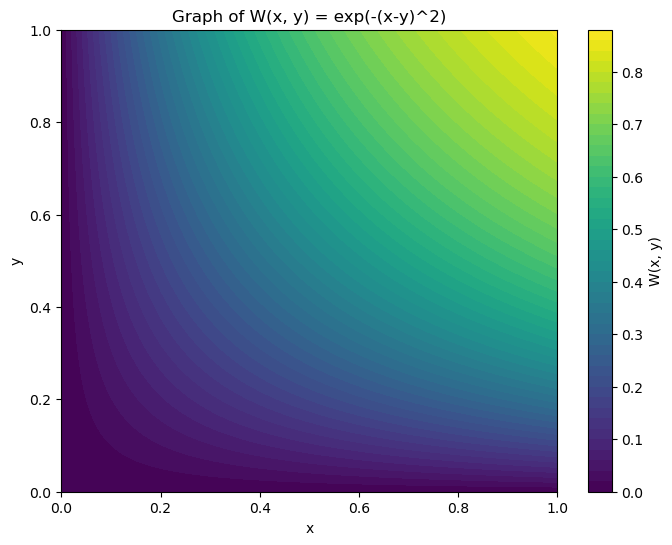

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def W(x, y):
    return 1-np.exp(-2 * x * y)
    # return np.exp(-((x - y) ** 2)/0.1)


# Create a grid of x and y values
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute W(x, y) for each pair of x and y values
Z = W(X, Y)
print(Z.max(), Z.min())
# Plot the resulting matrix
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(label="W(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of W(x, y) = exp(-(x-y)^2)")
plt.show()

In [1]:
import torch

# Create a random tensor
tensor = torch.tensor([[3, 1, 4], 
                       [1, 5, 9], 
                       [2, 6, 5]])

# Sort the tensor along dimension 0 (rows)
sorted_tensor_dim0, indices_dim0 = torch.sort(tensor, dim=0)

# Sort the tensor along dimension 1 (columns)
sorted_tensor_dim1, indices_dim1 = torch.sort(tensor, dim=1)

/cis/home/yma93/miniconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sorted_tensor_dim0

tensor([[1, 1, 4],
        [2, 5, 5],
        [3, 6, 9]])